# EDA

In [11]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Pré-processamento de valores nulos

In [12]:

path_arquivo = '../data/processed/simi_data.json'
with open(path_arquivo, 'r', encoding='utf-8') as f:
    dados_json = json.load(f)

df = pd.DataFrame(dados_json)

print("Dimensões do DataFrame:", df.shape)
print("\nInformações das colunas:")
df.info()

Dimensões do DataFrame: (2448, 33)

Informações das colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   cadastro_aprovado              2448 non-null   object
 1   autorizacao_divulgacao         2448 non-null   object
 2   nome_organizacao               2448 non-null   object
 3   cidade_sede                    2448 non-null   object
 4   uf_sede                        2448 non-null   object
 5   logo_url                       2448 non-null   object
 6   descricao_organizacao          2448 non-null   object
 7   site_organizacao               2448 non-null   object
 8   email_contato                  2448 non-null   object
 9   categoria_organizacao          2448 non-null   object
 10  fase_investimento_busca        2448 non-null   object
 11  incentivos_fiscais_municipio   2448 non-null   object
 12  o

Na verdade os valores Nulos são strings vazias, como " ". Substituindo por NaN, tem-se:

In [13]:

df.replace(' ', np.nan, inplace=True)
df.replace('', np.nan, inplace=True)

print("Valores nulos por coluna:")
df.isnull().sum().sort_values(ascending=False)

Valores nulos por coluna:


num_startups_investidas          2444
tese_investimento                2444
incentivos_fiscais_municipio     2416
orgao_responsavel_cti            2416
beneficios_programa              2403
exige_equity                     2402
preferencia_segmento             2402
investimento_medio_startup       2401
contato_divulgacao_cientifica    2376
areas_expertise                  2326
possui_nit                       2325
tipo_organizacao                 1959
fase_investimento_busca          1646
tecnologias_disruptivas          1481
fase_investimento_captada        1477
modelo_negocio                   1375
numero_funcionarios              1368
segmentacao_clientes             1358
fase_negocio                     1302
linkedin_url                     1102
programas_desenvolvimento         840
segmento_atuacao                  421
logo_url                          335
email_contato                     251
site_organizacao                   57
descricao_organizacao              17
cidade_sede 

Vamos analisar as colunas que possuem valores nulos e ver se faz sentido removê-las:

**num_startups_investidas**          2444 -> O número de startups no portfólio de um investidor ou aceleradora.

**tese_investimento**                2444 -> Descreve os critérios e o foco de um investidor para realizar investimentos.

**incentivos_fiscais_municipio**     2416 -> Descreve os incentivos fiscais que um município oferece para empresas de tecnologia.

**orgao_responsavel_cti**            2416 -> "O departamento responsável pela pauta de Ciência, Tecnologia e Inovação (CTI)."

**exige_equity**                     2402 -> Informa se um programa exige participação acionária (equity) da startup.

**contato_divulgacao_cientifica**    2376 -> O contato do setor ou pessoa responsável pela divulgação científica.

**areas_expertise**                  2326 -> As principais áreas do conhecimento ou competências técnicas da organização.

**possui_nit**                       2325 -> Informa se a organização possui um NIT (Núcleo de Inovação Tecnológica).

**tipo_organizacao**                 1959 -> Uma sub-categoria ou tipo mais específico da organização.

**fase_investimento_busca**          1646 -> O estágio de investimento mais recente que a organização já recebeu.

**logo_url**                          335 -> O link (URL) para a imagem do logotipo da organização.

**email_contato**                     251 -> O principal e-mail de contato fornecido pela organização.

**site_organizacao**                   57 -> O endereço do site oficial da organização.

**descricao_organizacao**              17 -> Texto descritivo sobre as atividades, missão e propósito da organização.

**cidade_sede**                         2 -> A cidade onde a sede principal da organização está localizada.


Destas colunas, vamos analisar os valores não nulos e ver se eles agregam algum valor para a pesquisa

Vamos analisar as linhas que não possuem `descricao_organizacao`

In [14]:
condicao_nulo = df['descricao_organizacao'].isnull()
display(df[condicao_nulo])

,cadastro_aprovado,autorizacao_divulgacao,nome_organizacao,cidade_sede,uf_sede,logo_url,descricao_organizacao,site_organizacao,email_contato,categoria_organizacao,...,segmentacao_clientes,fase_negocio,numero_funcionarios,fase_investimento_captada,busca_investimento,linkedin_url,preferencia_segmento,beneficios_programa,investimento_medio_startup,exige_equity
627,Sim,Sim,Verde Brasil Cosméticos,Governador Valadares,MG,https://i.postimg.cc/tTG9MqxR/image.png,NaN,https://verdebrasilcosmeticos.com.br/,contato@verdebrasilcosmeticos.com.br,Empresa de Base Tecnológica (EBT),...,NaN,NaN,NaN,NaN,Não,NaN,NaN,NaN,NaN,NaN
628,Sim,Sim,Velge,Governador Valadares,MG,https://i.postimg.cc/28MVrDpv/image.png,NaN,https://velge.com.br/,velgecomercial@gmail.com,Startup,...,NaN,NaN,NaN,NaN,Não,NaN,NaN,NaN,NaN,NaN
629,Sim,Sim,Spin Delivery,Governador Valadares,MG,https://i.postimg.cc/FzDW7rVh/image.png,NaN,https://www.instagram.com/spindelivery/,spindelivery@hotmail.com,Startup,...,NaN,NaN,NaN,NaN,Não,NaN,NaN,NaN,NaN,NaN
630,Sim,Sim,Sigma Solutions,Governador Valadares,MG,https://i.postimg.cc/fbw3gvng/image.png,NaN,https://sigmasolutions.com.br/,marco.saviatto@hotmail.com,Startup,...,NaN,NaN,NaN,NaN,Não,NaN,NaN,NaN,NaN,NaN
631,Sim,Sim,Sala de Encontro,Governador Valadares,MG,https://i.postimg.cc/Pxvd6LxR/svgexport-1.png,NaN,https://saladeencontro.com.br/,saladeencontrosuporte@gmail.com,Startup,...,NaN,NaN,NaN,NaN,Não,NaN,NaN,NaN,NaN,NaN
632,Sim,Sim,Recrutime,Governador Valadares,MG,https://i.postimg.cc/y84v6DCm/image.png,NaN,https://recruti.me/,leonardo@levex.com.br,Startup,...,NaN,NaN,NaN,NaN,Não,NaN,NaN,NaN,NaN,NaN
633,Sim,Sim,Pop Comunicação,Governador Valadares,MG,https://i.postimg.cc/QMFtZ0m6/image.png,NaN,https://popcomunicacao.com.br,luisgustavo.leao@popcomunicacao.com.br,Empresa de Base Tecnológica (EBT),...,NaN,NaN,NaN,NaN,Não,NaN,NaN,NaN,NaN,NaN
641,Sim,Sim,Mayor Química Produtos Químicos e de Limpeza,Governador Valadares,MG,https://i.postimg.cc/cLzSNZr3/logo-1584118152-...,NaN,https://www.mayorquimica.com.br/,pessoal.mayorquimica@hotmail.com,Empresa de Base Tecnológica (EBT),...,NaN,NaN,NaN,NaN,Não,NaN,NaN,NaN,NaN,NaN
642,Sim,Sim,Loji,Governador Valadares,MG,https://i.postimg.cc/dVZxsTDB/image.png,NaN,https://loji.com.br,leonardo@levex.com.br,Startup,...,NaN,NaN,NaN,NaN,Não,NaN,NaN,NaN,NaN,NaN
643,Sim,Sim,LK Tech,Governador Valadares,MG,https://i.postimg.cc/NjnVddHQ/image.png,NaN,https://lktech.com.br,lucas@lktech.com.br,Startup,...,NaN,NaN,NaN,NaN,Não,NaN,NaN,NaN,NaN,NaN


São instâncias que não possuem nenhuma informação relevante, portanto vamos descartar as linhas que possuem `descricao_organizacao` como nulo

In [15]:
df = df.dropna(subset=['descricao_organizacao'])

print(f"Formato do df DEPOIS de remover nulos: {df.shape}")

linhas_removidas = len(df) - len(df)
print(f"\nForam descartadas {linhas_removidas} linhas que possuíam 'descricao_organizacao' como nulo.")


Formato do df DEPOIS de remover nulos: (2431, 33)

Foram descartadas 0 linhas que possuíam 'descricao_organizacao' como nulo.


Agora vamos olhar pra cidade_sede

In [16]:
condicao_nulo = df['cidade_sede'].isnull()
display(df[condicao_nulo])

,cadastro_aprovado,autorizacao_divulgacao,nome_organizacao,cidade_sede,uf_sede,logo_url,descricao_organizacao,site_organizacao,email_contato,categoria_organizacao,...,segmentacao_clientes,fase_negocio,numero_funcionarios,fase_investimento_captada,busca_investimento,linkedin_url,preferencia_segmento,beneficios_programa,investimento_medio_startup,exige_equity
41,Sim,Sim,SPDX ADMINISTRADORA DE FUNDOS DE FORMATURA LTDA,NaN,"Filial situada a Rua Monteiro Lobato, n° 25, b...",https://i.postimg.cc/fyK8fdnJ/spdx.png,SPDX tem por objeto a administração da arrecad...,https://mundovivaextranet.vivaeventos.com.br,marcelo@gviva.com.br,Demais Organizações,...,NaN,NaN,NaN,NaN,Não,NaN,NaN,NaN,NaN,NaN
334,Sim,Sim,AgFoodVentures,NaN,MG e SP,https://i.postimg.cc/28rSTPz2/agfood-fundo-tra...,A AgFoodVentures é um Ecossistema de Inovação ...,https://agfood.ventures/,alainmarques@gmail.com,Fundo de Investimento | Investidor Anjo,...,NaN,NaN,NaN,Pré-Seed (Investimento total de 100 mil a 400 ...,Não,NaN,AgTech e foodtech,NaN,NaN,NaN


Apesar de não ter cidade sede, tem bastante informações, então não vamos descartar

In [17]:

colunas_para_descartar = [
        # os atributos abaixo não são pertinentes para nossa classificação (serão removidos de todos)
        'email_contato',
        'site_organizacao',
        'busca_investimento',
        'linkedin_url',
        'modelo_negocio',
        'cadastro_aprovado',
        'autorizacao_divulgacao',
        'logo_url',
        'numero_funcionarios',
        'uf_sede',
        'cidade_sede',
]
df = df.drop(columns=colunas_para_descartar)

## Pré-processamento de valores únicos

Das colunas selecionadas, vamos ver quais delas possuem valores únicos que podem ser discretizados de maneira que fique mais intuitivo
 Ao "perfilar" as colunas, você identifica quais são as variáveis categóricas e entende a distribuição de seus valores. Isso é fundamental para decidir quais gráficos usar e como agrupar seus dados

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2431 entries, 0 to 2447
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   nome_organizacao               2431 non-null   object
 1   descricao_organizacao          2431 non-null   object
 2   categoria_organizacao          2431 non-null   object
 3   fase_investimento_busca        802 non-null    object
 4   incentivos_fiscais_municipio   32 non-null     object
 5   orgao_responsavel_cti          32 non-null     object
 6   tipo_organizacao               489 non-null    object
 7   contato_divulgacao_cientifica  72 non-null     object
 8   possui_nit                     123 non-null    object
 9   areas_expertise                122 non-null    object
 10  tese_investimento              4 non-null      object
 11  num_startups_investidas        4 non-null      object
 12  segmento_atuacao               2027 non-null   object
 13  programa

A estratégia será a seguinte:

Iterar por cada coluna do seu df_final.

Para cada coluna, contar o número de valores únicos.

Se o número de valores únicos for baixo (ex: menos de 50), consideramos a coluna como categórica de baixa cardinalidade e exibimos todos os seus valores e contagens.

Se o número de valores únicos for alto, consideramos como categórica de alta cardinalidade (como cidade_sede) ou um identificador (como nome_organizacao). Nesses casos, exibimos apenas os valores mais frequentes.

In [19]:
for column in df.columns:
    # Ignora colunas que são obviamente de texto livre
    if column in ['nome_organizacao', 'descricao_organizacao', 'linkedin_url']:
        continue

    print(f"--- Análise da Coluna: '{column}' ---")
    
    num_unicos = df[column].nunique()
    
    limite_cardinalidade = 50 

    if num_unicos < limite_cardinalidade:
        print(f"Tipo: Categórica (Baixa Cardinalidade)")
        print(f"Número de Valores Únicos: {num_unicos}")
        print("Distribuição dos valores:")
        # .value_counts() conta a frequência de cada valor único
        print(df[column].value_counts())
    else:
        print(f"Tipo: Categórica (Alta Cardinalidade) ou Identificador")
        print(f"Número de Valores Únicos: {num_unicos}")
        print("Os 10 valores mais frequentes são:")
        # .head(10) pega apenas os 10 primeiros da contagem
        print(df[column].value_counts().head(10))
    
    print("_" * 50 + "\n")


--- Análise da Coluna: 'categoria_organizacao' ---
Tipo: Categórica (Baixa Cardinalidade)
Número de Valores Únicos: 9
Distribuição dos valores:
categoria_organizacao
Startup                                            1190
ICT | IES | Centro de P&D                           489
Demais Organizações                                 298
Empresa de Base Tecnológica (EBT)                   213
Média e Grande Empresa                              127
Incubadora                                           37
Pré-aceleradora | Aceleradora | Venture Builder      33
Governo Municipal                                    32
Fundo de Investimento | Investidor Anjo              12
Name: count, dtype: int64
__________________________________________________

--- Análise da Coluna: 'fase_investimento_busca' ---
Tipo: Categórica (Baixa Cardinalidade)
Número de Valores Únicos: 4
Distribuição dos valores:
fase_investimento_busca
Pré-Seed (Investimento total de 100 mil a 400 mil reais)           429
Seed (Inves

Dessa análise, tiramos que:
- `cadastro_aprovado`, `uf_sede`, `autorizacao_divulgacao` possui apenas 1 valor, então pode ser descartados

- `categoria_organizacao` possui 9 categorias, ideal para agrupamentos
- `segmento_atuacao` possui 934 valores unicos que podemos explorar pra ver se é discretizável
- `programas_desenvolvimento` possui 929 valores e eles não parecem muito uteis pros nossos objetivos
- `modelo_negocio` tem 131 valores unicos, explorar mais
- `tecnologias_disruptivas` possui 271 valores únicos, mas talvez seja porque o campo é um array. Se agruparmos podemos extrair algo
- `fase_negocio` 41 valores unicos se aplica ao mesmo do item de cima
- `numero_funcionarios` tem 14 valores unicos, mas da pra diminuir esses valores pois alguns estão preenchidos errados
- `fase_investimento_captada` tem 8 valores unicos
- `busca_investimento` pode ser discretizado pra booleano 'Sim' e 'Não'
- `preferencia_segmento` tem 44 valores unicos, mas parece se enquadrar mais para investidoras
- `investimento_medio_startup` também só se aplica a investidoras


## Nova Industria Brasil


#### Tipos de Organização e seus Papéis na Nova Indústria Brasil

| Tipo de Organização             | Papel na Nova Indústria Brasil                            | Como se Enquadra nas Missões                                       |
|--------------------------------|------------------------------------------------------------|---------------------------------------------------------------------|
| **Startup, EBT, Média/Grande Empresa** | **Executores Diretos**                                      | Desenvolvem os produtos/serviços que resolvem os desafios das 6 missões. |
| **ICT, IES, Centro de P&D**             | **Base de Conhecimento**                                     | Geram a pesquisa e a tecnologia fundamental para as soluções das missões. |
| **Incubadora, Aceleradora, etc.**      | **Estruturadores**                                           | Preparam e escalam os "Executores" para que tenham sucesso.             |
| **Fundo de Investimento, Anjo**        | **Financiadores**                                            | Fornecem o capital privado para o crescimento dos "Executores".         |
| **Governo Municipal**                  | **Articuladores Locais**                                     | Criam o ambiente de negócios local e conectam empresas aos programas.   |


Vamos mapear o tipo de organização para seu papel na Nova indústria brasil, assim segmentaremos o dataset e será mais fácil identificar quais features importam para cada ator e consequentemente, classificar as missões

In [20]:
mapeamento_papel = {
    'Startup': 'Executores Diretos das Missões',
    'Empresa de Base Tecnológica (EBT)': 'Executores Diretos das Missões',
    'Média e Grande Empresa': 'Executores Diretos das Missões',
    
    'ICT | IES | Centro de P&D': 'Base de Conhecimento e P&D',
    
    'Incubadora': 'Estruturadores e Multiplicadores do Ecossistema',
    'Pré-aceleradora | Aceleradora | Venture Builder': 'Estruturadores e Multiplicadores do Ecossistema',
    
    'Fundo de Investimento | Investidor Anjo': 'Financiadores do Ecossistema',
    
    'Governo Municipal': 'Articuladores e Fomentadores Públicos',
    
    'Demais Organizações': 'Demais Organizações'
}

df['papel_no_ecossistema'] = df['categoria_organizacao'].map(mapeamento_papel)



print("\nDistribuição dos novos segmentos:")
print(df['papel_no_ecossistema'].value_counts())




Distribuição dos novos segmentos:
papel_no_ecossistema
Executores Diretos das Missões                     1530
Base de Conhecimento e P&D                          489
Demais Organizações                                 298
Estruturadores e Multiplicadores do Ecossistema      70
Articuladores e Fomentadores Públicos                32
Financiadores do Ecossistema                         12
Name: count, dtype: int64


In [21]:
print("\nAmostra do resultado (5 linhas aleatórias):")
colunas_para_verificar = ['nome_organizacao', 'categoria_organizacao', 'papel_no_ecossistema']

try:
    display(df[colunas_para_verificar].sample(5))
except NameError:
    print(df[colunas_para_verificar].sample(5))



Amostra do resultado (5 linhas aleatórias):


,nome_organizacao,categoria_organizacao,papel_no_ecossistema
2443,Empresa de Pesquisa Agropecuária de Minas Gera...,ICT | IES | Centro de P&D,Base de Conhecimento e P&D
846,Gira,Startup,Executores Diretos das Missões
2163,Inova Farm,Startup,Executores Diretos das Missões
1544,Atacado óptico,Demais Organizações,Demais Organizações
2187,Exsto Tecnologia,Empresa de Base Tecnológica (EBT),Executores Diretos das Missões


### Executores Diretos das Missões

Vamos pegar o dataset todo, adicionar a coluna papel_no_ecossistema e para cada papel, analisar as colunas que iremos manter

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2431 entries, 0 to 2447
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   nome_organizacao               2431 non-null   object
 1   descricao_organizacao          2431 non-null   object
 2   categoria_organizacao          2431 non-null   object
 3   fase_investimento_busca        802 non-null    object
 4   incentivos_fiscais_municipio   32 non-null     object
 5   orgao_responsavel_cti          32 non-null     object
 6   tipo_organizacao               489 non-null    object
 7   contato_divulgacao_cientifica  72 non-null     object
 8   possui_nit                     123 non-null    object
 9   areas_expertise                122 non-null    object
 10  tese_investimento              4 non-null      object
 11  num_startups_investidas        4 non-null      object
 12  segmento_atuacao               2027 non-null   object
 13  programa

Para o df de executores diretos das missões (Startup, EBT, Média e Grande Empresa), quais colunas não fazem sentido manter?

In [39]:


# 2. Defina os papéis que queremos isolar e os nomes dos arquivos
papeis_para_salvar = {
    'Executores Diretos das Missões': 'executores_missoes.csv',
    'Base de Conhecimento e P&D': 'base_conhecimento_pd.csv',
    'Demais Organizações': 'demais_organizacoes.csv'
}

# 3. Crie um loop para filtrar e salvar cada um dos arquivos
for papel, nome_arquivo in papeis_para_salvar.items():
    print(f"Filtrando '{papel}'...")
    
    # Filtra o dataframe
    condicao = df['papel_no_ecossistema'] == papel
    df_filtrado = df[condicao]
    
    # Define o caminho completo para salvar o novo arquivo
    caminho_para_salvar = f'../reports/{nome_arquivo}'
    
    # Salva o dataframe filtrado em um novo CSV
    # O argumento 'index=False' é MUITO importante para não salvar 
    # o índice do pandas como uma coluna extra no CSV.
    df_filtrado.to_csv(caminho_para_salvar, index=False)
    
    print(f"-> Sucesso! Salvo como '{nome_arquivo}' com {len(df_filtrado)} linhas.\n")

print("Processo concluído!")

Filtrando 'Executores Diretos das Missões'...
-> Sucesso! Salvo como 'executores_missoes.csv' com 1530 linhas.

Filtrando 'Base de Conhecimento e P&D'...
-> Sucesso! Salvo como 'base_conhecimento_pd.csv' com 489 linhas.

Filtrando 'Demais Organizações'...
-> Sucesso! Salvo como 'demais_organizacoes.csv' com 298 linhas.

Processo concluído!


In [24]:
colunas_para_descartar = [
        # os atributos abaixo não são de executores
        'tese_investimento',
        'orgao_responsavel_cti',
        'num_startups_investidas',
        'areas_expertise',
        'possui_nit',
        'contato_divulgacao_cientifica',
        'tipo_organizacao',
        'incentivos_fiscais_municipio',
        'exige_equity',
        'preferencia_segmento',
        'beneficios_programa',
        'investimento_medio_startup',
        
        # candidatos a sair, mas que talvez sejam uteis em futuras analises
        'fase_investimento_busca',
        'programas_desenvolvimento',
        'segmentacao_clientes',
        'fase_investimento_captada',
]
df_executores = df_executores.drop(columns=colunas_para_descartar)

In [25]:
df_executores.isnull().sum().sort_values(ascending=False)

tecnologias_disruptivas    563
fase_negocio               434
nome_organizacao             0
descricao_organizacao        0
categoria_organizacao        0
segmento_atuacao             0
papel_no_ecossistema         0
dtype: int64

In [26]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

In [27]:
df_executores

,nome_organizacao,descricao_organizacao,categoria_organizacao,segmento_atuacao,tecnologias_disruptivas,fase_negocio,papel_no_ecossistema
2,Thronus Group LTDA,"Somos uma biofarmacêutica canadense, líder mundial na produção e desenvolvimento de produtos ino...",Empresa de Base Tecnológica (EBT),Saúde,Nanotecnologia,"Tração (Início da consolidação e repetição de processos para áreas da EBT, como vendas, marketin...",Executores Diretos das Missões
3,Manuel VAIoT,Plataforma de IoT para acompanhamento de biossinais de idosos e doentes cronicos,Startup,Saúde,"Deep Learning, IOT (Internet das Coisas), Machine Learning",Ideação (Fase de concepção da ideia até consolidação do Mínimo Produto Viável - MVP para um nich...,Executores Diretos das Missões
7,GeoTI,"Desde 2009, a GEOTI alia ética e inovação para transformar desafios em soluções \ntecnológicas. ...",Empresa de Base Tecnológica (EBT),"Gestão de negócios, Tecnologia da informação",Big Data,"Tração (Início da consolidação e repetição de processos para áreas da EBT, como vendas, marketin...",Executores Diretos das Missões
8,Wabtec Brasil Fabricação e Manutenção de Equipamentos LTDA,"A Wabtec é a principal empresa de tecnologia ferroviária do mundo, liderando o caminho na criaçã...",Média e Grande Empresa,"Mineração e Metalurgia, Transporte e Automotivo",NaN,NaN,Executores Diretos das Missões
9,AgroDelTa,Somos uma startup para analise de solo em tempo real! Levantamos os os dados químicos completos ...,Startup,Agronegócio,IOT (Internet das Coisas),Ideação (Fase de concepção da ideia até consolidação do Mínimo Produto Viável - MVP para um nich...,Executores Diretos das Missões
...,...,...,...,...,...,...,...
2429,Direto de Minas Market Place,Market Place com nicho em produtos de minas gerais,Startup,Indústria 4.0,Nenhuma,Operação (Fase em que a startup atua de forma a consolidar um número considerável de primeiros c...,Executores Diretos das Missões
2435,EventTable Internet & Soluções,A EventTable é plataforma criada com foco em agrupar tudo o que é necessário para a realização d...,Startup,"Publicidade, Entretenimento, Alimentos, Gestão de negócios, Imóveis, Varejo",Nenhuma,Operação (Fase em que a startup atua de forma a consolidar um número considerável de primeiros c...,Executores Diretos das Missões
2436,SMARTIS,O Smartis é o termômetro de preços do pequeno varejista. É uma ferramenta inteligente (web/mobil...,Startup,Varejo,"Big Data, AI",Operação (Fase em que a startup atua de forma a consolidar um número considerável de primeiros c...,Executores Diretos das Missões
2438,EmbryoAll Soluções Tecnológicas Ltda.,Sou professor de biologia e embriologista. A 10 anos atrás reduzi bastante minhas aulas para me ...,Startup,Saúde,Machine Learning,"Tração (Início da consolidação e repetição de processos para áreas da startup, como vendas, mark...",Executores Diretos das Missões


In [28]:
for column in df_executores.columns:
    # Ignora colunas que são obviamente de texto livre
    if column in ['nome_organizacao', 'descricao_organizacao', 'linkedin_url']:
        continue

    print(f"--- Análise da Coluna: '{column}' ---")
    
    num_unicos = df_executores[column].nunique()
    
    limite_cardinalidade = 50 

    if num_unicos < limite_cardinalidade:
        print(f"Tipo: Categórica (Baixa Cardinalidade)")
        print(f"Número de Valores Únicos: {num_unicos}")
        print("Distribuição dos valores:")
        # .value_counts() conta a frequência de cada valor único
        print(df_executores[column].value_counts())
    else:
        print(f"Tipo: Categórica (Alta Cardinalidade) ou Identificador")
        print(f"Número de Valores Únicos: {num_unicos}")
        print("Os 10 valores mais frequentes são:")
        # .head(10) pega apenas os 10 primeiros da contagem
        print(df_executores[column].value_counts().head(10))
    
    print("_" * 50 + "\n")


--- Análise da Coluna: 'categoria_organizacao' ---
Tipo: Categórica (Baixa Cardinalidade)
Número de Valores Únicos: 3
Distribuição dos valores:
categoria_organizacao
Startup                              1190
Empresa de Base Tecnológica (EBT)     213
Média e Grande Empresa                127
Name: count, dtype: int64
__________________________________________________

--- Análise da Coluna: 'segmento_atuacao' ---
Tipo: Categórica (Alta Cardinalidade) ou Identificador
Número de Valores Únicos: 658
Os 10 valores mais frequentes são:
segmento_atuacao
Tecnologia da informação    106
Saúde                       105
Agronegócio                  75
Educação                     61
Finanças                     57
Gestão de negócios           50
Publicidade                  44
Varejo                       27
Indústria 4.0                26
Construção                   23
Name: count, dtype: int64
__________________________________________________

--- Análise da Coluna: 'tecnologias_disruptivas' 

uma variável categórica multivalorada que está armazenada como uma única string!

In [29]:
print(df_executores['segmento_atuacao'].value_counts())

segmento_atuacao
Tecnologia da informação                                                                                                                                                                106
Saúde                                                                                                                                                                                   105
Agronegócio                                                                                                                                                                              75
Educação                                                                                                                                                                                 61
Finanças                                                                                                                                                                                 57
                                           

In [30]:
print("--- ANÁLISE CORRETA DA COLUNA 'segmento_atuacao' ---")

# 1. Ignorar nulos, dividir a string por vírgula. O resultado é uma Série de listas.
#    Ex: 'Saúde, Tecnologia' -> ['Saúde', ' Tecnologia']
segmentos_series_de_listas = df_executores['segmento_atuacao'].dropna().str.split(',')

# 2. "Explodir" a Série. Cada item da lista vira uma nova linha.
#    Ex: ['Saúde', ' Tecnologia'] -> duas linhas, uma 'Saúde' e outra ' Tecnologia'
segmentos_explodidos = df_executores['segmento_atuacao'].dropna().astype(str).str.split(',').explode().str.strip()
segmentos_explodidos = segmentos_series_de_listas.explode()

# 3. Limpar espaços em branco no início e no fim de cada string.
#    Ex: ' Tecnologia' -> 'Tecnologia'
segmentos_limpos = segmentos_explodidos.str.strip()

# 4. Contar a frequência de cada segmento individual.
contagem_real_segmentos = segmentos_limpos.value_counts()


print(f"Análise original mostrava {df_executores['segmento_atuacao'].nunique()} combinações únicas.")
print(f"Análise correta mostra {len(contagem_real_segmentos)} segmentos individuais.")
print("\nOs 20 segmentos de atuação mais frequentes (contagem real):")

# Exibe o resultado final
print(contagem_real_segmentos)

--- ANÁLISE CORRETA DA COLUNA 'segmento_atuacao' ---
Análise original mostrava 658 combinações únicas.
Análise correta mostra 212 segmentos individuais.

Os 20 segmentos de atuação mais frequentes (contagem real):
segmento_atuacao
Tecnologia da informação                            352
Agronegócio                                         220
Saúde                                               217
Gestão de negócios                                  211
Indústria 4.0                                       165
                                                   ... 
Gestão Hídrica Comunidade de startups                 1
Tecnologia da informaçãoLaboratório próprio           1
AgronegócioParque tecnológico                         1
Terceiro Setor                                        1
Soluções para comercialização no ambiente online      1
Name: count, Length: 212, dtype: int64


/var/folders/61/64x1pjk54bv3p9950_f2rs1c0000gn/T/ipykernel_44284/3056031511.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=top_20_segmentos.values, y=top_20_segmentos.index, palette='viridis')
/var/folders/61/64x1pjk54bv3p9950_f2rs1c0000gn/T/ipykernel_44284/3056031511.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


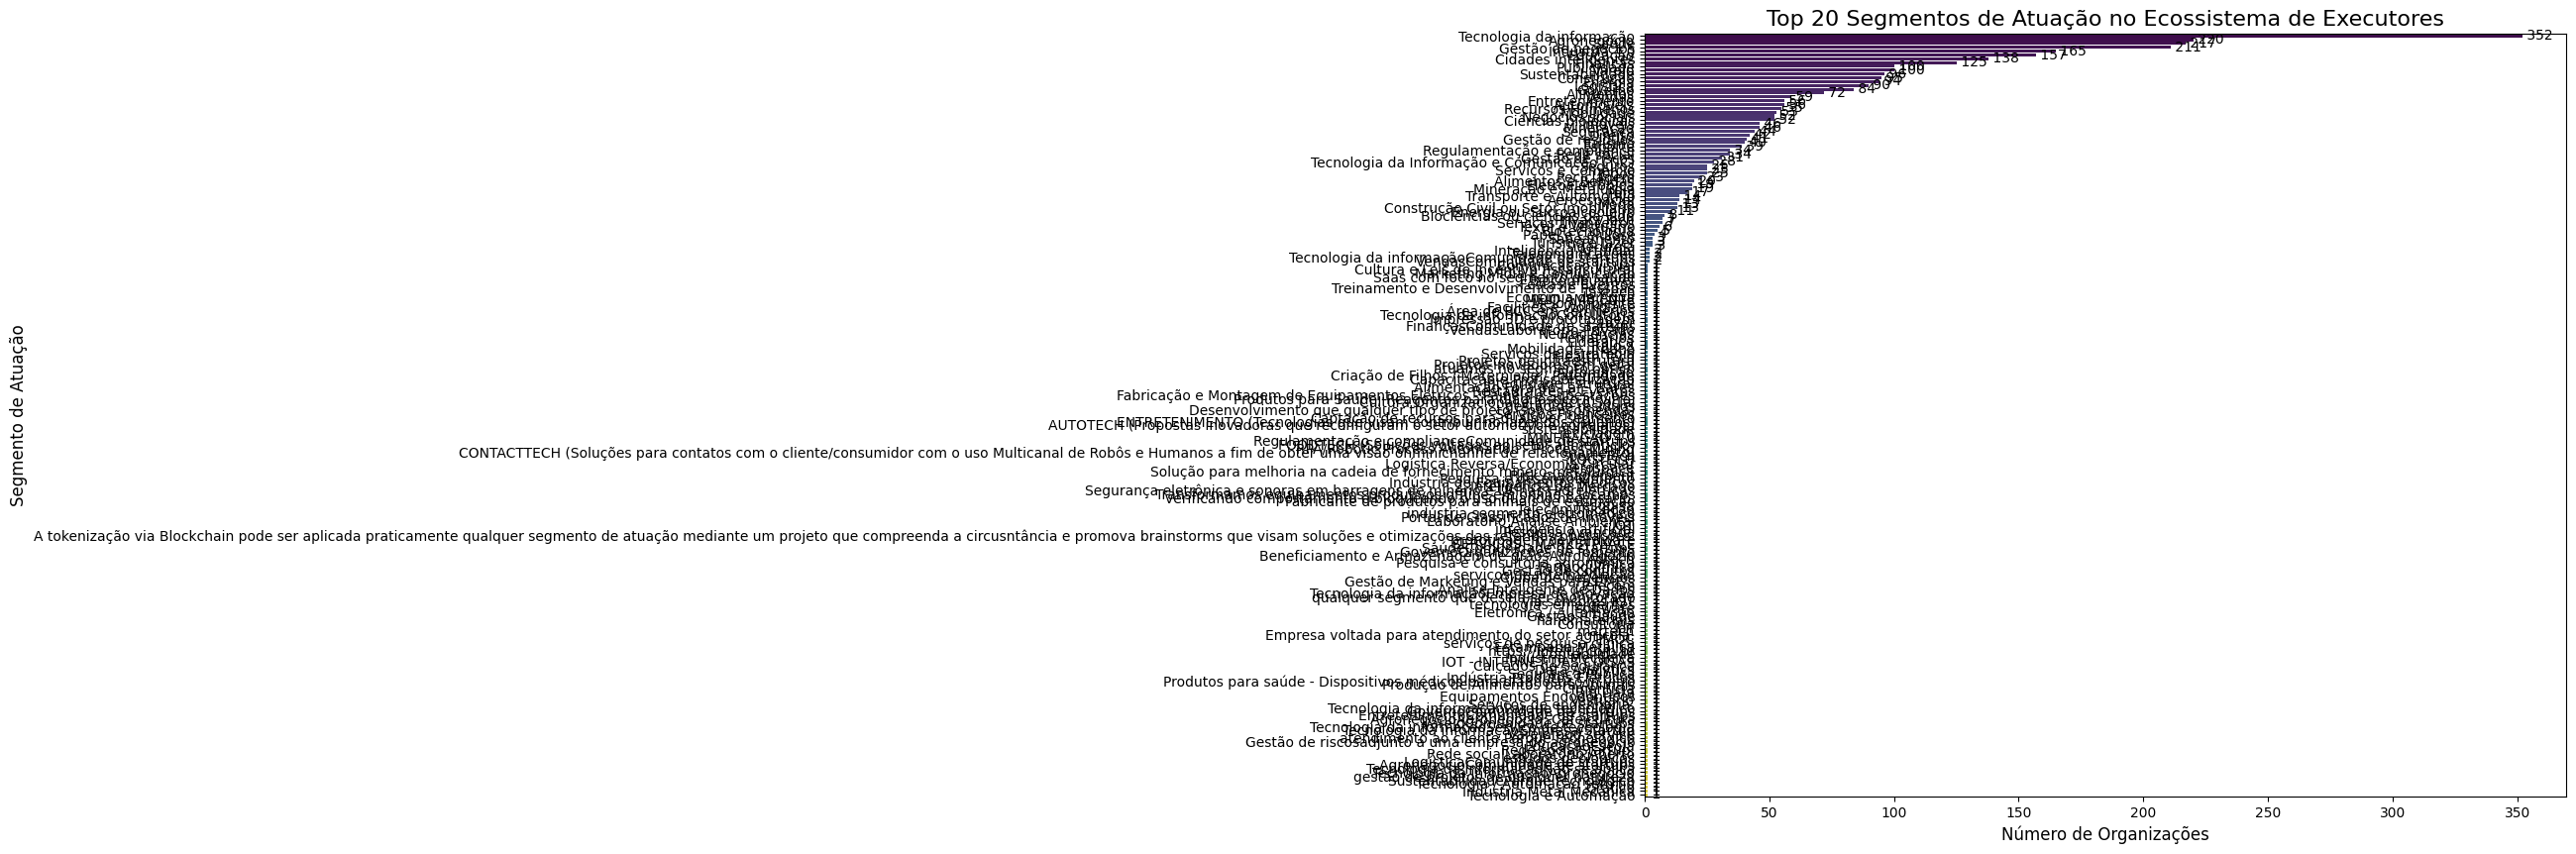

In [31]:
# 1. SELECIONAR OS 20 SEGMENTOS MAIS COMUNS
top_20_segmentos = contagem_real_segmentos.head(200)

# 2. CONFIGURAR O GRÁFICO
plt.figure(figsize=(12, 10)) # Define o tamanho da figura (largura, altura)

# Cria o gráfico de barras horizontais
# y = top_20_segmentos.index     -> Os nomes dos segmentos no eixo Y
# x = top_20_segmentos.values    -> As contagens no eixo X
# palette='viridis'              -> Um esquema de cores agradável
barplot = sns.barplot(x=top_20_segmentos.values, y=top_20_segmentos.index, palette='viridis')

# 3. ADICIONAR TÍTULOS E RÓTULOS
plt.title('Top 20 Segmentos de Atuação no Ecossistema de Executores', fontsize=16)
plt.xlabel('Número de Organizações', fontsize=12)
plt.ylabel('Segmento de Atuação', fontsize=12)

# 4. ADICIONAR OS NÚMEROS DE CONTAGEM NAS BARRAS (OPCIONAL, MAS RECOMENDADO)
for index, value in enumerate(top_20_segmentos.values):
    plt.text(value, index, f' {value}', va='center')

# Ajusta o layout para evitar que os rótulos fiquem cortados
plt.tight_layout()

# 5. MOSTRAR O GRÁFICO
plt.show()


In [32]:
# --- REUTILIZANDO A LÓGICA ANTERIOR PARA IDENTIFICAR AS LINHAS ---
# 1. Identificar empresas com apenas um segmento
condicao_um_segmento = ~df_executores['segmento_atuacao'].str.contains(',', na=False)
df_segmento_unico = df_executores[condicao_um_segmento]

# 2. Identificar os segmentos raros
segmentos_explodidos = df_executores['segmento_atuacao'].dropna().str.split(',').explode().str.strip()
contagem_geral_segmentos = segmentos_explodidos.value_counts()
segmentos_raros = contagem_geral_segmentos[contagem_geral_segmentos == 1]
lista_segmentos_raros = segmentos_raros.index.tolist()

# 3. Encontrar o DataFrame das empresas a serem removidas
condicao_segmento_raro = df_segmento_unico['segmento_atuacao'].isin(lista_segmentos_raros)
df_para_remover = df_segmento_unico[condicao_segmento_raro]

# 4. Obter os índices dessas empresas
indices_para_remover = df_para_remover.index


# --- ETAPA PRINCIPAL: REMOVER AS LINHAS DO df_executores ---

print(f"Formato original do df_executores: {df_executores.shape}")
print(f"Serão removidas {len(indices_para_remover)} empresas de nicho exclusivo.")

# Usa .drop() com os índices identificados. 
# 'axis=0' indica que estamos removendo linhas (é o padrão, mas é bom ser explícito).
df_executores = df_executores.drop(indices_para_remover, axis=0)

print(f"Formato final do df_executores: {df_executores.shape}")


# --- VERIFICAÇÃO FINAL ---

# Vamos verificar se uma das empresas removidas ainda está no novo DataFrame
if not indices_para_remover.empty:
    primeiro_indice_removido = indices_para_remover[0]
    if primeiro_indice_removido in df_executores.index:
        print("\nERRO: A verificação falhou. A linha não foi removida.")
    else:
        print(f"\nVerificação bem-sucedida: A empresa com índice {primeiro_indice_removido} não está mais no DataFrame limpo.")



Formato original do df_executores: (1530, 7)
Serão removidas 43 empresas de nicho exclusivo.
Formato final do df_executores: (1487, 7)

Verificação bem-sucedida: A empresa com índice 110 não está mais no DataFrame limpo.


Identificados 109 segmentos que aparecem apenas uma vez no dataset.

Formato original do df_executores: (1487, 7)
Serão removidas 102 empresas associadas a segmentos raros.
Formato final do df_executores: (1385, 7)

Gerando o novo gráfico com os dados limpos...


/var/folders/61/64x1pjk54bv3p9950_f2rs1c0000gn/T/ipykernel_44284/2139451285.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_segmentos_limpo.values, y=top_20_segmentos_limpo.index, palette='viridis_r') # usei _r para inverter as cores


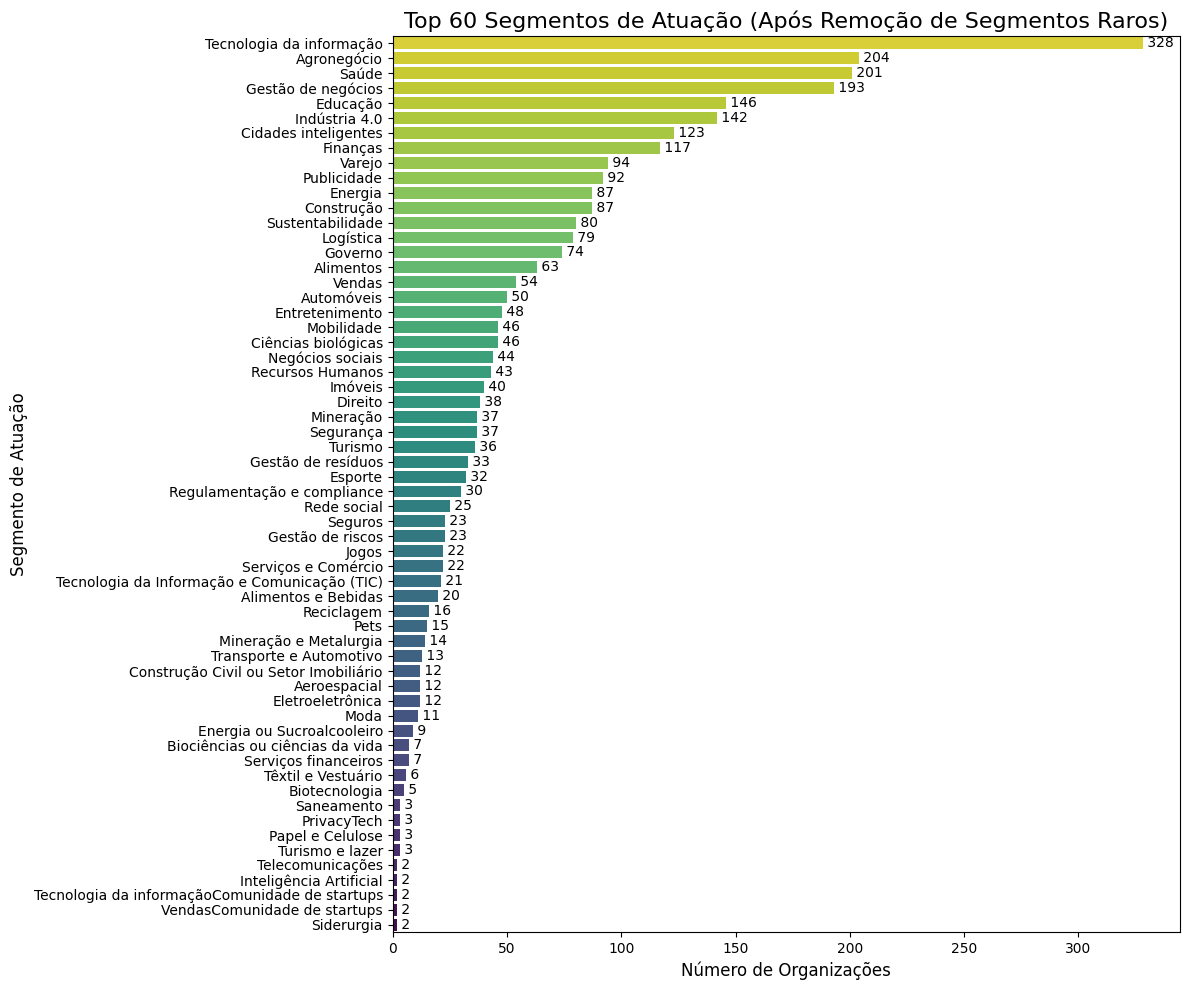

In [33]:
# PASSO 1: Identificar a lista de segmentos raros (contagem total == 1)
segmentos_explodidos = df_executores['segmento_atuacao'].dropna().astype(str).str.split(',').explode().str.strip()
contagem_geral_segmentos = segmentos_explodidos.value_counts()
segmentos_raros = contagem_geral_segmentos[contagem_geral_segmentos == 1]
set_segmentos_raros = set(segmentos_raros.index)

print(f"Identificados {len(set_segmentos_raros)} segmentos que aparecem apenas uma vez no dataset.")


# PASSO 2: Identificar todas as empresas que possuem pelo menos um desses segmentos raros
def tem_segmento_raro(segmentos_str):
    if not isinstance(segmentos_str, str):
        return False
    segmentos_da_empresa = {s.strip() for s in segmentos_str.split(',')}
    return not segmentos_da_empresa.isdisjoint(set_segmentos_raros)

# Cria uma série booleana (True/False) para flaguear as linhas a serem removidas
linhas_para_remover_flag = df_executores['segmento_atuacao'].apply(tem_segmento_raro)


# PASSO 3: Remover as linhas identificadas
print(f"\nFormato original do df_executores: {df_executores.shape}")
num_linhas_a_remover = linhas_para_remover_flag.sum()
print(f"Serão removidas {num_linhas_a_remover} empresas associadas a segmentos raros.")

# O operador '~' inverte o filtro booleano, selecionando apenas as linhas que NÃO devem ser removidas.
df_executores = df_executores[~linhas_para_remover_flag]

print(f"Formato final do df_executores: {df_executores.shape}")


# PASSO 4 (Opcional, mas recomendado): Gerar o gráfico novamente com os dados limpos
print("\nGerando o novo gráfico com os dados limpos...")

# Recalcular a contagem de segmentos com o DataFrame limpo
segmentos_explodidos_limpo = df_executores['segmento_atuacao'].dropna().astype(str).str.split(',').explode().str.strip()
contagem_real_segmentos_limpo = segmentos_explodidos_limpo.value_counts()

top_20_segmentos_limpo = contagem_real_segmentos_limpo.head(60)

# Configurar o gráfico
plt.figure(figsize=(12, 10))
sns.barplot(x=top_20_segmentos_limpo.values, y=top_20_segmentos_limpo.index, palette='viridis_r') # usei _r para inverter as cores
plt.title('Top 60 Segmentos de Atuação (Após Remoção de Segmentos Raros)', fontsize=16)
plt.xlabel('Número de Organizações', fontsize=12)
plt.ylabel('Segmento de Atuação', fontsize=12)
for index, value in enumerate(top_20_segmentos_limpo.values):
    plt.text(value, index, f' {value}', va='center')
plt.tight_layout()
plt.show()


In [34]:
df_executores

,nome_organizacao,descricao_organizacao,categoria_organizacao,segmento_atuacao,tecnologias_disruptivas,fase_negocio,papel_no_ecossistema
2,Thronus Group LTDA,"Somos uma biofarmacêutica canadense, líder mundial na produção e desenvolvimento de produtos ino...",Empresa de Base Tecnológica (EBT),Saúde,Nanotecnologia,"Tração (Início da consolidação e repetição de processos para áreas da EBT, como vendas, marketin...",Executores Diretos das Missões
3,Manuel VAIoT,Plataforma de IoT para acompanhamento de biossinais de idosos e doentes cronicos,Startup,Saúde,"Deep Learning, IOT (Internet das Coisas), Machine Learning",Ideação (Fase de concepção da ideia até consolidação do Mínimo Produto Viável - MVP para um nich...,Executores Diretos das Missões
7,GeoTI,"Desde 2009, a GEOTI alia ética e inovação para transformar desafios em soluções \ntecnológicas. ...",Empresa de Base Tecnológica (EBT),"Gestão de negócios, Tecnologia da informação",Big Data,"Tração (Início da consolidação e repetição de processos para áreas da EBT, como vendas, marketin...",Executores Diretos das Missões
8,Wabtec Brasil Fabricação e Manutenção de Equipamentos LTDA,"A Wabtec é a principal empresa de tecnologia ferroviária do mundo, liderando o caminho na criaçã...",Média e Grande Empresa,"Mineração e Metalurgia, Transporte e Automotivo",NaN,NaN,Executores Diretos das Missões
9,AgroDelTa,Somos uma startup para analise de solo em tempo real! Levantamos os os dados químicos completos ...,Startup,Agronegócio,IOT (Internet das Coisas),Ideação (Fase de concepção da ideia até consolidação do Mínimo Produto Viável - MVP para um nich...,Executores Diretos das Missões
...,...,...,...,...,...,...,...
2429,Direto de Minas Market Place,Market Place com nicho em produtos de minas gerais,Startup,Indústria 4.0,Nenhuma,Operação (Fase em que a startup atua de forma a consolidar um número considerável de primeiros c...,Executores Diretos das Missões
2435,EventTable Internet & Soluções,A EventTable é plataforma criada com foco em agrupar tudo o que é necessário para a realização d...,Startup,"Publicidade, Entretenimento, Alimentos, Gestão de negócios, Imóveis, Varejo",Nenhuma,Operação (Fase em que a startup atua de forma a consolidar um número considerável de primeiros c...,Executores Diretos das Missões
2436,SMARTIS,O Smartis é o termômetro de preços do pequeno varejista. É uma ferramenta inteligente (web/mobil...,Startup,Varejo,"Big Data, AI",Operação (Fase em que a startup atua de forma a consolidar um número considerável de primeiros c...,Executores Diretos das Missões
2438,EmbryoAll Soluções Tecnológicas Ltda.,Sou professor de biologia e embriologista. A 10 anos atrás reduzi bastante minhas aulas para me ...,Startup,Saúde,Machine Learning,"Tração (Início da consolidação e repetição de processos para áreas da startup, como vendas, mark...",Executores Diretos das Missões


In [35]:

caminho_saida_csv = '../data/processed/df_executores.csv'

# Usa o método .to_csv() para salvar
# index=False é CRUCIAL para não salvar o índice do pandas como uma coluna extra.
# encoding='utf-8-sig' garante a compatibilidade com caracteres especiais (ç, ã) e com o Excel.
df_executores.to_csv(caminho_saida_csv, index=False, encoding='utf-8-sig')

print(f"DataFrame salvo com sucesso em: '{caminho_saida_csv}'")
print(f"O arquivo contém {df_executores.shape[0]} linhas e {df_executores.shape[1]} colunas.")


DataFrame salvo com sucesso em: '../data/processed/df_executores.csv'
O arquivo contém 1385 linhas e 7 colunas.


## Análises

/var/folders/61/64x1pjk54bv3p9950_f2rs1c0000gn/T/ipykernel_44284/2589793272.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=tecnologias, order=tecnologias.value_counts().index, palette='rocket')


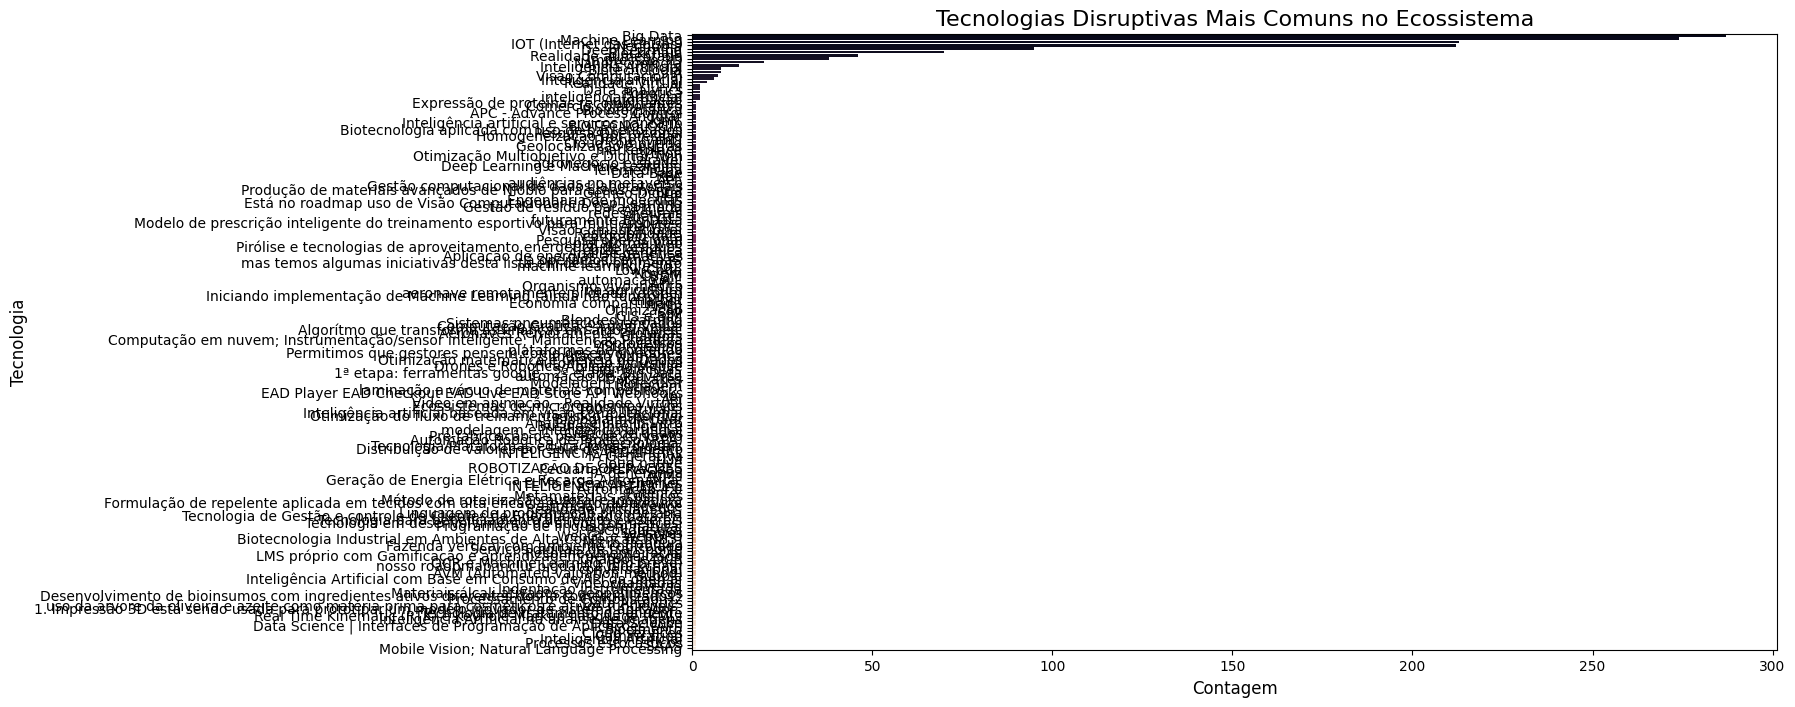

In [36]:
# O método .dropna() remove as startups que não listaram tecnologias
# O .str.split(', ') quebra a string em uma lista
# O .explode() cria uma nova linha para cada item da lista
tecnologias = df_executores['tecnologias_disruptivas'].dropna().str.split(', ').explode()

# Agora contamos as tecnologias mais comuns
plt.figure(figsize=(14, 8))
sns.countplot(y=tecnologias, order=tecnologias.value_counts().index, palette='rocket')
plt.title('Tecnologias Disruptivas Mais Comuns no Ecossistema', fontsize=16)
plt.xlabel('Contagem', fontsize=12)
plt.ylabel('Tecnologia', fontsize=12)
plt.show()